In [1]:
%pylab inline
import seaborn as sns; sns.set()

Populating the interactive namespace from numpy and matplotlib


C:\Users\aenfi\Miniconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Naive Bayes classification

Traits:
- very fast, simple
- few tunable parameters
- work well with high-dimensional data

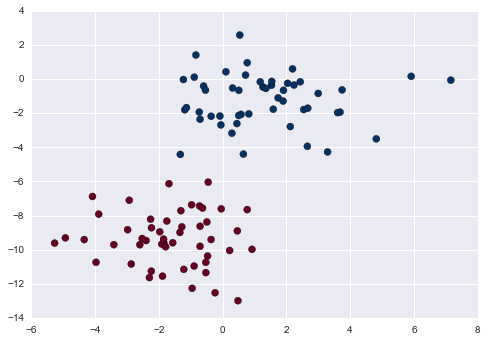

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

In [3]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB()

In [4]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

(-6.0, 8.0, -14.0, 4.0)

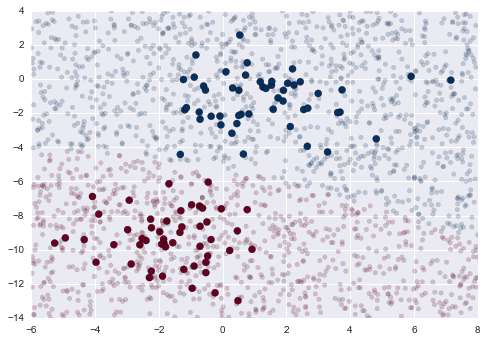

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.2)
plt.axis(lim)

The predict_proba method gives the posterior probabilities of each label.

In [6]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[ 0.89,  0.11],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 0.  ,  1.  ],
       [ 0.15,  0.85]])

# Multinomial Naive Bayes

The general naive Bayes idea - which I think is that the probabilities are independent, or at least can be simplified to be treated that way even when they're demonstrably not actually independent - can be used with different assumptions. Above it was, I think, that the observations were normally distributed. Here, it's that the observations come from a 'multinomial' distribution. Multinomial is the corrolary of the binomial distribution, but for n categories instead of just two categories. Both distributions give the probability of observing a certain number of counts for different categories. 

Further, the binomial distribution is the probability distribution of the number of successes for two categories in a given number of Bernoulli trials with the same probability of success in each trial. In the multinomial distribution the corrolary of the Bernoulli distribution is the categorical distribution.

In practice, this works well where the features represent counts or count rates. For example, it works well with text classification where the features are related to word counts or frequencies.

In [7]:
from sklearn.datasets import fetch_20newsgroups

# get i think just metadata associated w/ the groups?
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [9]:
# just look at a few groups
categories = ['talk.religion.misc','soc.religion.christian',
              'sci.space','comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [12]:
print(train.data[5])  # using print formats text according to embedded separators

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



To use the data for ML work, we want to convert the content of each string into a vector of numbers - we'll do this using the TFIDF vectorizer, and create a pipeline which attaches the vectorizer to a multinomial naive Bayes classifier. (The text still hasn't generally explained how pipelines work, and hasn't in the MEAP copy explained TFIDF.)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB)

In [19]:
model.fit?

In [17]:
train.target

array([2, 2, 1, ..., 2, 3, 1], dtype=int64)

In [20]:
model.fit(X = train.data, y=train.target)
labels = model.predict(test.data)

TypeError: fit() missing 1 required positional argument: 'y'